# Study of the file Doodler

## Import

In [2]:
import sys
sys.path.append("sources")
from Doodler import *
import Data_generator
import utils
import random

import matplotlib.pyplot as plt

## Test

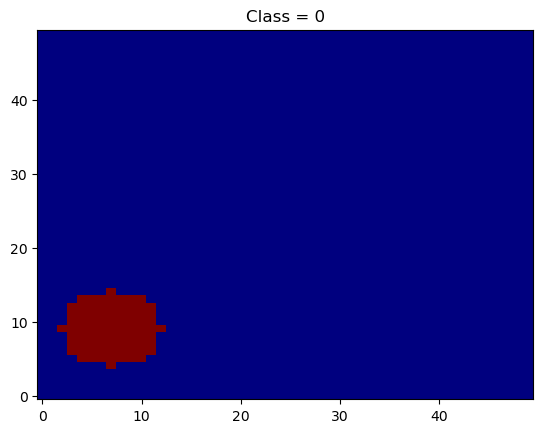

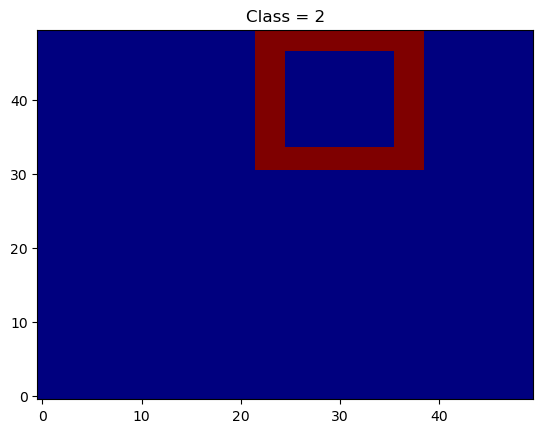

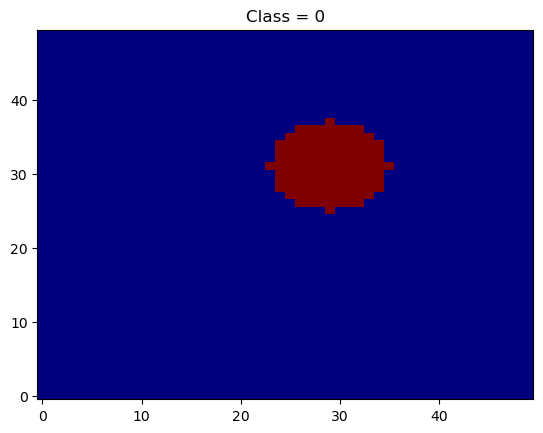

In [8]:
c = gen_standard_cases(count=3,rows=50,cols=50,wr=[0.2,0.5],hr=[0.2,0.4],
                       noise=0, cent=False, show=True, flat=False,
                       fc=(1,1),auto=False,mono=True,one_hots=True,multi=False)

In [9]:
c

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 [0, 2, 0],
 (50, 50),
 False)

In [5]:
dump_doodle_cases(c,'test_cases')

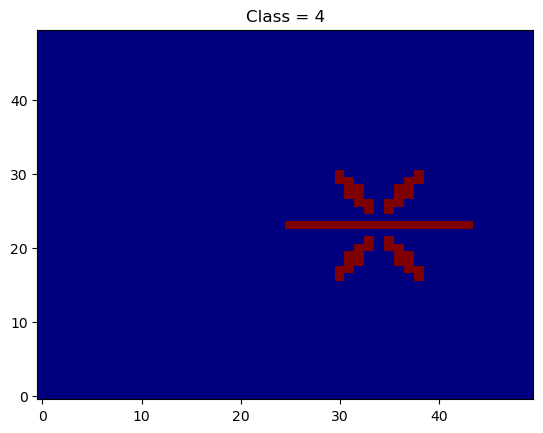

In [7]:
show_doodle_cases(c)

## Make the class for the file "Data Generator"

In [46]:
class Data_Generator():

    # Create se set of parameters for the data generator
    def __init__(self,number_data=100, n=25, noise=0, tr_size=0.7, test_size=0.2, wr=[0.3,0.7], hr=[0.3,0.7], flat=False,random_seed = None) -> None:

        # Verify that the parameters are valid
        self.validate_parameter("number_data", number_data, 1, 1000)
        self.validate_parameter("n", n, 10, 50)
        self.validate_parameter("noise", noise, 0, 1)
        self.validate_parameter("tr_size", tr_size, 0, 1)
        self.validate_parameter("test_size", test_size, 0, 1)
        self.validate_parameter("tr_size+test_size", tr_size + test_size, 0, 1, error_message="tr_size+test_size must be less than 1")
        self.validate_parameter("wr", wr[0], 0, 1,error_message="wr[0] must be less than between 0 and 1")
        self.validate_parameter("wr", wr[1], 0, 1,error_message="wr[1] must be less than between 0 and 1")
        self.validate_parameter("wr", wr[0], 0, wr[1],error_message="wr[0] must be less than wr[1]")
        self.validate_parameter("hr", hr[0], 0, 1,error_message="hr[0] must be less than between 0 and 1")
        self.validate_parameter("hr", hr[1], 0, 1,error_message="hr[1] must be less than between 0 and 1")
        self.validate_parameter("hr", hr[0], 0, hr[1],error_message="hr[0] must be less than hr[1]")
        self.validate_boolean("flat", flat)

        # Set the parameters
        self.number_data = number_data
        self.n = n
        self.noise = noise
        self.tr_size = tr_size
        self.test_size = test_size
        self.val_size = 1 - tr_size - test_size
        self.wr = wr
        self.hr = hr
        self.flat = flat
        self.random_seed = random_seed

        # Data variables
        self.tr_data = None
        self.test_data = None
        self.val_data = None

    # Fonction to raise an error if the parameters are not valid (range issues)
    def validate_parameter(self, name, value, min_value, max_value, error_message=None):
        if not min_value <= value <= max_value:
            error_message = error_message or f"{name} must be between {min_value} and {max_value}"
            raise ValueError(error_message)

    # Fonction to raise an error if the parameters are not valid (type issues)
    def validate_boolean(self, name, value):
        if type(value) != bool:
            raise TypeError(f"{name} must be a boolean")

    
    # Split the data into 3 sets
    def split_data(self,data):

        # Create a list from the range
        data_range = list(range(self.number_data))
        
        # Shuffle the list randomly
        random.shuffle(data_range)
        
        # Calculate the sizes for each set
        tr_end = int(self.tr_size * self.number_data)
        test_end = int((self.tr_size + self.test_size) * self.number_data)

        # Split the list into 3 sets
        tr_index = data_range[:tr_end]
        test_index = data_range[tr_end:test_end]
        val_index = data_range[test_end:]

        # create each set of data
        tr_data = [data[0][i] for i in tr_index]
        test_data = [data[0][i] for i in test_index]
        val_data = [data[0][i] for i in val_index]

        # target data
        tr_target = [data[1][i] for i in tr_index]
        test_target = [data[1][i] for i in test_index]
        val_target =  [data[1][i] for i in val_index]

        # labels
        tr_label = [data[2][i] for i in tr_index]
        test_label = [data[2][i] for i in test_index]
        val_label = [data[2][i] for i in val_index]

        # make the effective split
        self.tr_data = (tr_data, tr_target, tr_label, data[3], data[4])
        self.test_data = (test_data, test_target, test_label, data[3], data[4])
        self.val_data = (val_data, val_target, val_label, data[3], data[4])
        
        

    # Generate the data
    def generate_data(self,return_data=False):
        
        if self.random_seed is not None:
            random.seed(self.random_seed)
            
        # Generate the data
        data = gen_standard_cases(  count=self.number_data,rows=self.n,cols=self.n,wr=self.wr,hr=self.hr,
                                    noise=self.noise, cent=False, show=False, flat=self.flat,
                                    fc=(1,1),auto=False,mono=True,one_hots=True,multi=False)
        # Split the data
        self.split_data(data)

        # Return the data if needed
        if return_data:
            return self.get_data()

        print("Data generated")

    # Return the data
    def get_data(self):
        return self.tr_data, self.test_data, self.val_data
    
    # Save Data 
    def save_data(self, path):
        dump_doodle_cases(self.tr_data,path+"/tr_data")
        dump_doodle_cases(self.test_data,path+"/test_data")
        dump_doodle_cases(self.val_data,path+"/val_data")
        print("Data saved at : ",path)


In [47]:
# Create the data generator
data_gen = Data_Generator(number_data=100, n=25, noise=0, tr_size=0.7, test_size=0.2, wr=[0.2,0.7], hr=[0.2,0.7], flat=False,random_seed = 42)
data = data_gen.generate_data(return_data=True)
data_gen.save_data("data")


Data saved at :  data


Data saved at :  data/test


(array([34.,  0.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  0.,  0., 36.,
         0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0., 41.,
         0.,  0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0., 38.,  0.,
         0.,  0.,  0.,  0., 49.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
        5.28, 5.44, 5.6 , 5.76, 5.92, 6.08, 6.24, 6.4 , 6.56, 6.72, 6.88,
        7.04, 7.2 , 7.36, 7.52, 7.68, 7.84, 8.  ]),
 <BarContainer object of 50 artists>)

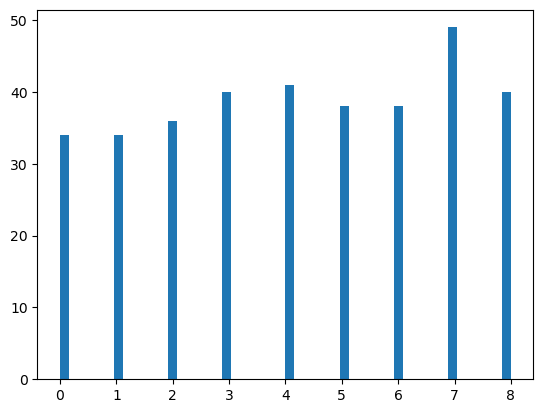

In [10]:
# Test of the Data_generator file
generator = Data_generator.Data_generator(number_data=500, n=25, noise=0, tr_size=0.7, test_size=0.2, wr=[0.2,0.7], hr=[0.2,0.7], flat=False,random_seed = 42)
data = generator.generate_data(return_data=True)
generator.save_data("data/test")

plt.hist(data[0][2], bins=50)

## Configuration file

In [13]:
# Function to read the config file
def read_config_file(file_path):
    config = {"GLOBALS": {}, "LAYERS": []}
    current_section = None

    with open(file_path, 'r') as file:
        # we read the file line by line
        for line in file:
            print(line)

            # Ignore black line or line starting with #
            if line.strip() == '' or line.startswith('#'):
                continue

            # Set the actual section (GLOBALS or LAYERS)
            if line.startswith("GLOBALS"):
                current_section = "GLOBALS"
                continue
            elif line.startswith("LAYERS"):
                current_section = "LAYERS"
                continue

            # Analyse the line
            key_value_pairs = [pair.strip() for pair in line.split(',')]
            if current_section == "GLOBALS":
                for pair in key_value_pairs:
                    key, value = pair.split(':')
                    config["GLOBALS"][key.strip()] = value.strip()
            elif current_section == "LAYERS":
                layer_info = {}
                for pair in key_value_pairs:
                    key, value = pair.split(':')
                    layer_info[key.strip()] = value.strip()
                config["LAYERS"].append(layer_info)

    return config

In [4]:
config = utils.read_config_file("config/config_test.txt")
data = Data_generator.load_data(config["GLOBALS"]["data"])
config

Data loaded from :  data/test


{'GLOBALS': {'data': 'data/test',
  'loss': 'cross_entropy',
  'lrate': '0.1',
  'wreg': '0.001',
  'wrt': 'L2'},
 'LAYERS': [{'input': '20'},
  {'size': '100', 'act': 'relu', 'wr': '(-0.1 0.1)', 'lrate': '0.01'},
  {'size': '5', 'act': 'relu', 'wr': '(-0.1 0.1)', 'br': '(0 1)'},
  {'type': 'softmax'}]}

## Beginning of the NN

In [ ]:
class Network():
    
    def __init__(self,config) -> None:

        global_config = config["GLOBALS"]
        layers_config = config["LAYERS"]

        # Load the data
        data = utils.load_data(global_config["data"])
        self.tr_data = data[0]                  # Training data
        self.test_data = data[1]                # Testing data
        self.val_data = data[2]                 # Validation data

        # Load the general parameters
        self.loss = global_config["loss"]       # Loss function
        self.lrate = global_config["lrate"]     # Learning rate
        self.wreg = global_config["wreg"]       # Weight regularization
        self.wrt = global_config["wrt"]         # Weight regularization type

        # Load the layers
        self.layers = []
        for layer_config in layers_config:
            self.layers.append(Layer(layer_config))

    def forward(self, input):
        pass


    def backward(self, input):
        pass

In [ ]:
class Layer():

    def __init__(self, layer_config) -> None:

        self.type = layer_config.get("type", "basic_layer") # Type of the layer

        if self.type == "basic_layer":
            self.size = layer_config.get("size", 5)         # Size of the layer
            self.act = layer_config.get("act", "sigmoid")   # Activation function
            self.wr = layer_config.get("wr", [-0.1, 0.1])   # Weight range
            self.lrate = layer_config.get("lrate", None)    # Learning rate

        elif self.type == "softmax":
            self.size = layer_config.get("size", None)      # Size of the layer
        

    def forward(self, input):
        pass

    def backward(self, input):
        pass

    